In [1]:
from numba import jit
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

In [48]:
from by_utility import *

In [49]:
%%time
by = BY()

CPU times: user 1min 33s, sys: 817 ms, total: 1min 33s
Wall time: 19.1 s


In [47]:
by.w_star

array([[502.8869725 , 502.00793322, 501.14067147, 500.27035453,
        499.39457449, 498.52439543],
       [507.42480316, 506.4519219 , 505.49839805, 504.54793774,
        503.5972917 , 502.65733514],
       [512.5877207 , 511.5205391 , 510.47933961, 509.44617147,
        508.41722326, 507.40353808],
       [518.28717107, 517.14136261, 516.02634246, 514.92256582,
        513.82589045, 512.7478571 ],
       [524.65360115, 523.46242778, 522.30367612, 521.15656027,
        520.01683131, 518.89696158],
       [532.43201189, 531.25741366, 530.10947389, 528.96668191,
        527.82532718, 526.69975312]])

In [22]:
by.θ

-26.999999999999996

In [23]:
w = np.ones((3, 3))

In [26]:
for i in range(10):
    w_next = by.T(w)
    print(np.max(np.abs(w_next - w)))
    w[:] = w_next

16.528998773594566
21.327363178825863
27.51805658926456
35.504899769925075
45.808779694031074
59.10157083765256
76.2498811405946
98.37146695737584
126.90798445823259
163.71880620622574


In [38]:
by = BY(read_from_file=True)

In [39]:
z, σ = 0.0012, 0.0072

In [52]:
z, σ = by.update_state(z, σ)

In [53]:
z, σ

(-0.00047408703491565076, 0.007283397965314243)

In [54]:
m = 10000
obs = np.empty(m)
for i in range(m):
    D, S, SD_sum = by.simulate_dividends_and_deflator(z_0=z, σ_0=σ, ts_length=1000, seed=i)
    obs[i] = SD_sum

In [55]:
obs.mean()

190.16688751456064

In [56]:
obs.max()

48682.99900032478

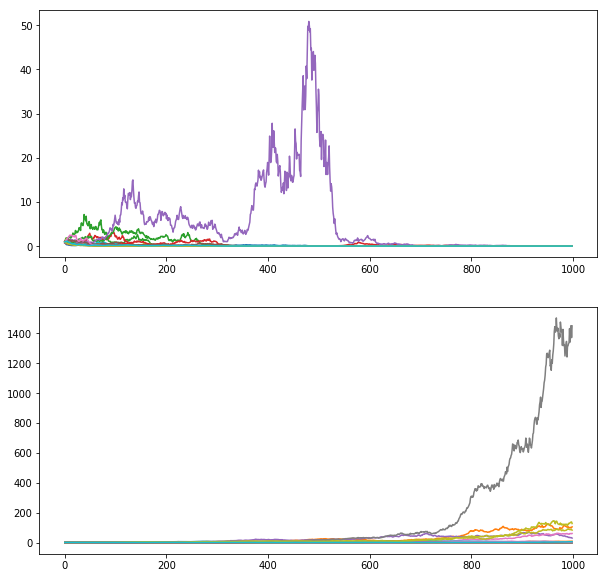

In [57]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
m = 20
for i in range(m):
    D, S, SD_sum = by.simulate_dividends_and_deflator(z_0=z, σ_0=σ, ts_length=1000, seed=i)
    axes[0].plot(S[1:])
    axes[1].plot(D[1:])

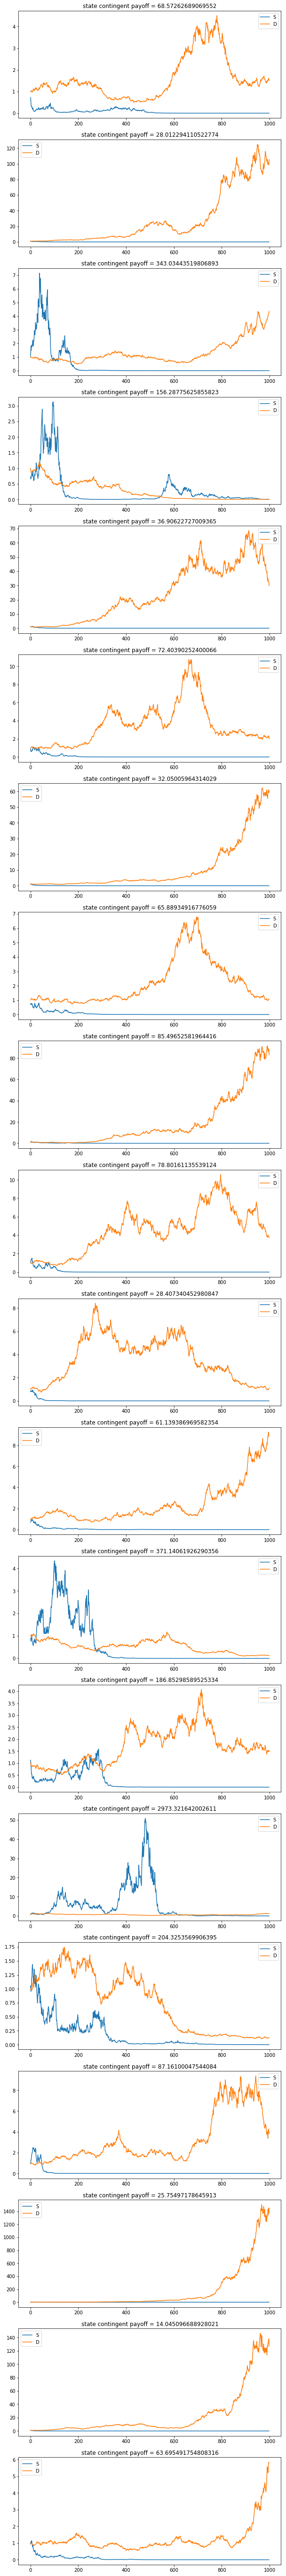

In [58]:
m = 20
fig, axes = plt.subplots(m, 1, figsize=(10, 100))
for i in range(m):
    D, S, SD_sum = by.simulate_dividends_and_deflator(z_0=z, σ_0=σ, ts_length=1000, seed=i)
    axes[i].plot(S[1:], label="S")
    axes[i].plot(D[1:], label="D")
    axes[i].set_title(f"state contingent payoff = {SD_sum}")
    axes[i].legend()

In [59]:
D, S, SD_sum = by.simulate_dividends_and_deflator(z_0=z, σ_0=σ, ts_length=100, seed=1)

In [60]:
D

array([-1.36311572e+57,  1.00000000e+00,  1.01483907e+00,  1.03527463e+00,
        1.00387369e+00,  1.01242037e+00,  1.03848885e+00,  1.01642655e+00,
        1.01367489e+00,  1.02010435e+00,  9.89494454e-01,  1.00303304e+00,
        1.03124579e+00,  1.01145121e+00,  1.02710053e+00,  9.96560011e-01,
        1.00060382e+00,  9.61459340e-01,  9.94702216e-01,  1.00904716e+00,
        1.01075863e+00,  9.92673274e-01,  1.03150035e+00,  1.09494862e+00,
        1.04147885e+00,  1.08436995e+00,  1.14356075e+00,  1.15924864e+00,
        1.12028726e+00,  1.15289053e+00,  1.14950039e+00,  1.13068489e+00,
        1.08784058e+00,  1.11087757e+00,  1.14401419e+00,  1.12471554e+00,
        1.15163887e+00,  1.11459801e+00,  1.15062718e+00,  1.15835827e+00,
        1.15689527e+00,  1.15875104e+00,  1.19823504e+00,  1.23463732e+00,
        1.26300073e+00,  1.27424883e+00,  1.28315426e+00,  1.31817808e+00,
        1.33535698e+00,  1.37437542e+00,  1.36643908e+00,  1.26033060e+00,
        1.31281001e+00,  